# Second Dataset 

3_SSE:1488.9409543202476
4_SSE:1178.6159054544285
5_SSE:886.0074777959857
6_SSE:758.7447308226131
7_SSE:743.9362433650842
8_SSE:690.689606126812
9_SSE:2022.88196667482
10_SSE:616.1961798093462
11_SSE:579.9556654194411
12_SSE:2022.88196667482
13_SSE:2022.88196667482
14_SSE:515.1762314116578
15_SSE:2022.88196667482
16_SSE:2022.88196667482
17_SSE:2022.88196667482
18_SSE:476.1845965860515
19_SSE:2022.88196667482


<function matplotlib.pyplot.show(*args, **kw)>

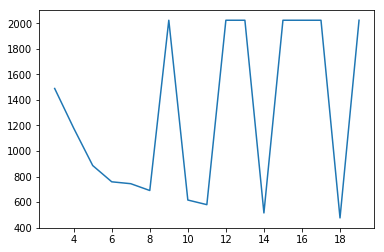

In [5]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
from copy import deepcopy

#reading from Database uding pandas    
df = pd.read_csv ('data_kmeans_2.csv')
data=np.array(df.T)
x=data[0]
y=data[1]




# Euclidean Distance Caculator
def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)


X = np.array(list(zip(x, y)))

def sse_dist(a,b):
    return np.sqrt((a[0]-b[0])^2+(a[1]-b[1])^2)

# Number of clusters
SSE_list = []
for k in range(3,20):
    # X coordinates of random centroids
    C_x = np.random.randint(0, np.max(x), size=k)
    # Y coordinates of random centroids
    C_y = np.random.randint(np.min(y), np.max(y), size=k)
    C = np.array(list(zip(C_x, C_y)), dtype=np.float32)
    #print(C)



    # To store the value of centroids when it updates
    C_old = np.zeros(C.shape)
    # Cluster Lables(0, 1, 2)
    clusters = np.zeros(len(X))
    # Error func. - Distance between new centroids and old centroids
    error = dist(C, C_old, None)
    # Loop will run till the error becomes zero
    #while error != 0:


    
    for counter in range(10):
        # Assigning each value to its closest cluster
        for i in range(len(X)):
            distances = dist(X[i], C)
            cluster = np.argmin(distances)
            clusters[i] = cluster
        # Storing the old centroid values
        C_old = deepcopy(C)
        # Finding the new centroids by taking the average value
        for i in range(k):
            points = [X[j] for j in range(len(X)) if clusters[j] == i]
            C[i] = np.mean(points, axis=0)
        error = dist(C, C_old, None)
        
    SSE=0;    
    for i in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j] == i]
        C[i] = np.mean(points, axis=0)
        
        for n in range(len(points)):
            SSE = SSE+ np.linalg.norm(points[n]-C[i])         
    
        
    SSE_list.append(SSE)
    print('{}_SSE:{}'.format(k,SSE))


plt.plot(range(3,20),SSE_list)
plt.show

## So base on Elbow Plot we select k=8

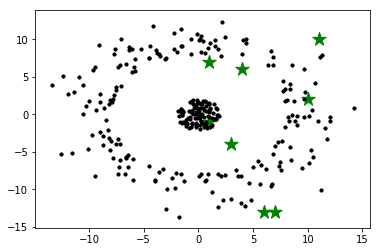

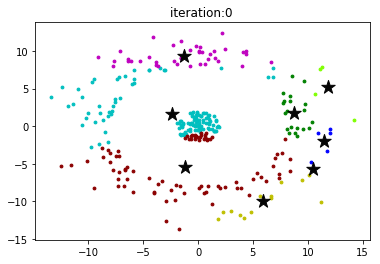

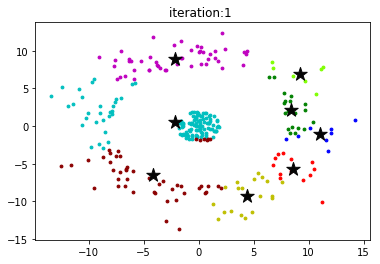

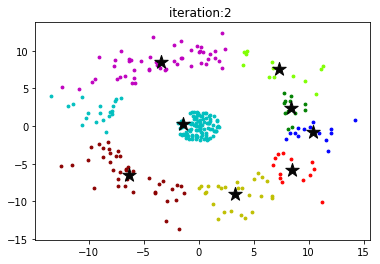

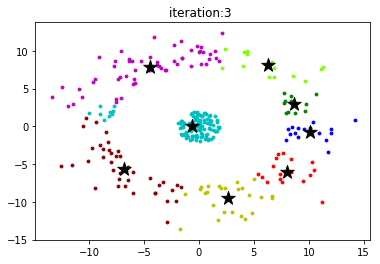

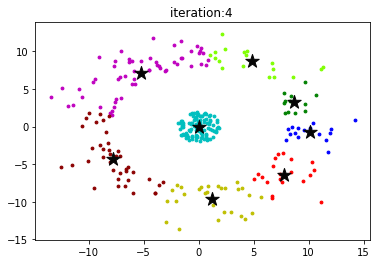

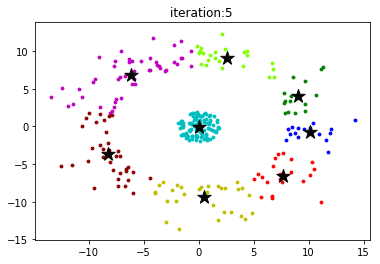

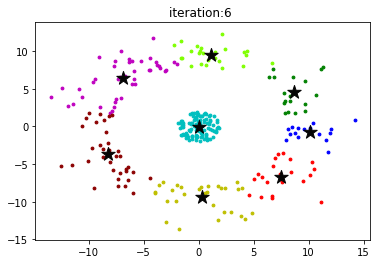

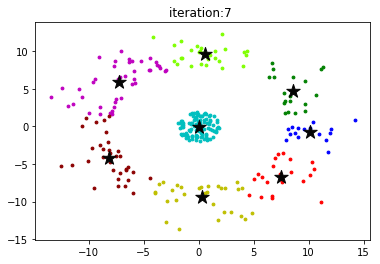

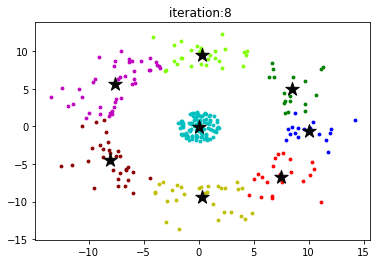

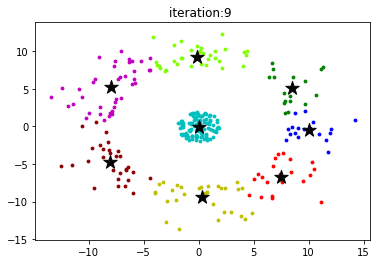

In [9]:
# Plotting along with the Centroids
k=8
plt.scatter(x, y, c='#050505', s=8)
plt.scatter(C_x, C_y, marker='*', s=200, c='g')

plt.scatter(x,y, c='black', s=8)


# X coordinates of random centroids
C_x = np.random.randint(0, np.max(x), size=k)
# Y coordinates of random centroids
C_y = np.random.randint(np.min(y), np.max(y), size=k)
C = np.array(list(zip(C_x, C_y)), dtype=np.float32)
#print(C)



# To store the value of centroids when it updates
C_old = np.zeros(C.shape)
# Cluster Lables(0, 1, 2)
clusters = np.zeros(len(X))
# Error func. - Distance between new centroids and old centroids
error = dist(C, C_old, None)
# Loop will run till the error becomes zero
#while error != 0:

colors = ['r', 'g', 'b', 'y', 'c', 'm','chartreuse','darkred']


for counter in range(10):
    # Assigning each value to its closest cluster
    for i in range(len(X)):
        distances = dist(X[i], C)
        cluster = np.argmin(distances)
        clusters[i] = cluster
    # Storing the old centroid values
    C_old = deepcopy(C)
    # Finding the new centroids by taking the average value
    for i in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j] == i]
        C[i] = np.mean(points, axis=0)
    error = dist(C, C_old, None)


    for i in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j] == i]
        C[i] = np.mean(points, axis=0)

    fig, ax = plt.subplots()
    for i in range(k):
            points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
            ax.scatter(points[:, 0], points[:, 1], s=8, c=colors[i])
            ax.set_title("iteration:{} ".format(counter))
    ax.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='#050505')
 
plt.show()

    

10_SSE:651.2215201330819
20_SSE:644.5884765162328
30_SSE:642.8418824005861
40_SSE:642.8418824005852
50_SSE:646.8379221030693
60_SSE:651.3939146255449
70_SSE:2022.88196667482
80_SSE:2022.88196667482
90_SSE:620.9372602329877


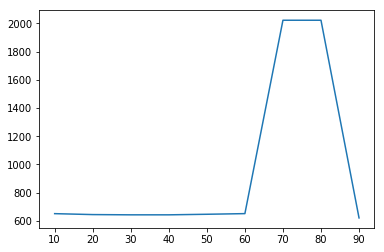

In [14]:
#plot SSE based on number of iteration 
SSE_list=[]
k=8



for NumOfIteration in range(10,100,10):

    C_x = np.random.randint(0, np.max(x), size=k)
    # Y coordinates of random centroids
    C_y = np.random.randint(np.min(y), np.max(y), size=k)
    C = np.array(list(zip(C_x, C_y)), dtype=np.float32)
    #print(C)



    # To store the value of centroids when it updates
    C_old = np.zeros(C.shape)
    # Cluster Lables(0, 1, 2)
    clusters = np.zeros(len(X))
    # Error func. - Distance between new centroids and old centroids
    error = dist(C, C_old, None)
    # Loop will run till the error becomes zero
    #while error != 0:


    
    for counter in range(NumOfIteration):
        # Assigning each value to its closest cluster
        for i in range(len(X)):
            distances = dist(X[i], C)
            cluster = np.argmin(distances)
            clusters[i] = cluster
        # Storing the old centroid values
        C_old = deepcopy(C)
        # Finding the new centroids by taking the average value
        for i in range(k):
            points = [X[j] for j in range(len(X)) if clusters[j] == i]
            C[i] = np.mean(points, axis=0)
        error = dist(C, C_old, None)

    SSE=0;    
    for i in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j] == i]
        C[i] = np.mean(points, axis=0)

        for n in range(len(points)):
            SSE = SSE+ np.linalg.norm(points[n]-C[i])         


    SSE_list.append(SSE)
    print('{}_SSE:{}'.format(NumOfIteration,SSE))

plt.plot(range(10,100,10),SSE_list)
plt.show()
